In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('financial_source.xlsx',sheet_name='Quarter Source')

In [8]:
df['year_no'] = df['Year'].dt.year

profit_df =  df.groupby('year_no').agg(
    total_op=('Operating Profit','sum'),
    total_gp=('Gross Profit','sum'),
    total_np=('Net Profit','sum')
)

profit_df = profit_df.sort_values(by='year_no')
profit_df.reset_index(inplace=True)
profit_df

,year_no,total_op,total_gp,total_np
0,2020,309043,407398,266677
1,2021,373686,441149,316771
2,2022,425091,467501,400456
3,2023,585698,608429,486140
4,2024,380243,391555,321546


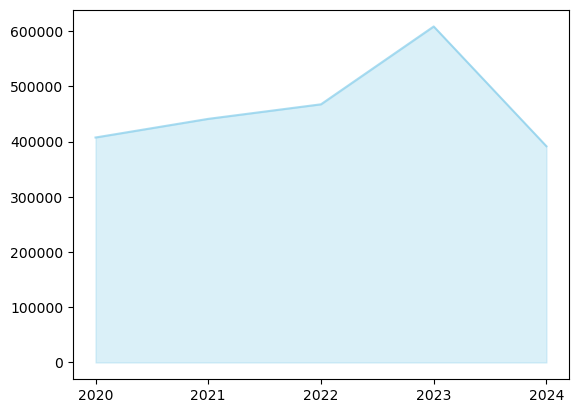

In [9]:
plt.fill_between(profit_df['year_no'],profit_df['total_gp'], color="skyblue", alpha=0.3)
plt.plot(profit_df['year_no'],profit_df['total_gp'], color="skyblue", alpha=0.7)
plt.xticks(profit_df['year_no'], profit_df['year_no'])

plt.show()

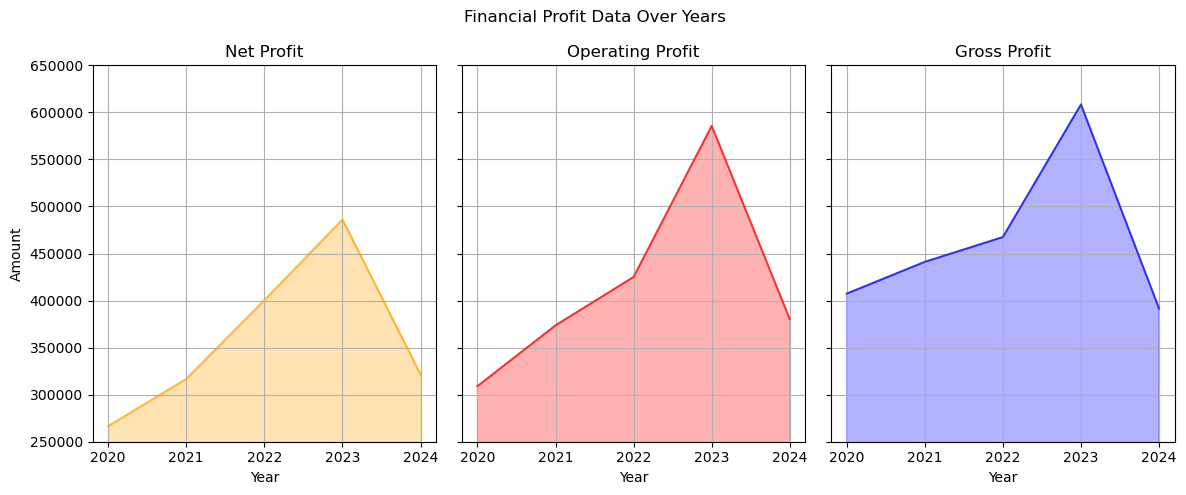

In [13]:
fig, ax = plt.subplots(1,3,figsize=(12,5))

fill_properties = [
    ('total_np', 'orange', 'Net Profit'),
    ('total_op', 'red', 'Operating Profit'),
    ('total_gp', 'blue', 'Gross Profit')
]

for i, (column, color, label) in enumerate(fill_properties):
    ax[i].fill_between(profit_df['year_no'],profit_df[column], color=color, alpha=0.3)
    ax[i].plot(profit_df['year_no'],profit_df[column], color=color, alpha=0.7)
    ax[i].set_title(label)
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Amount')
    ax[i].grid(True)
    if i != 0:
        ax[i].set_yticklabels([])
        ax[i].set_ylabel('')
    ax[i].set_ylim(250000,650000)

plt.suptitle('Financial Profit Data Over Years')
plt.tight_layout()
plt.show()